# Non-categorical ML model

Here we train a model using features from non-categorical columns,
which were previously extracted.

We use a grid search algorithm to find the best model between
a random forest and a logistic regression.
These two were chosen, among other reasons, because they can automatically predict
probabilities and not just a yes/no answer.

In [53]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, f1_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [4]:
plt.style.use('ggplot')

In [5]:
customer_features = pd.read_json(
    "../data/customer_features.json",
    orient='table',
)

In [6]:
customer_features.head()

,last_order_age_days,n_orders_holidays,mean_hour_of_day,std_hour_of_day,mean_day_of_week,std_day_of_week,first_order_age_days,n_orders,max_customer_order_rank,n_failed,...,n_vouchers,tot_delivery_fee,max_delivery_fee,n_delivery_fee,tot_amount_paid,avg_amount_paid,max_amount_paid,min_amount_paid,n_restaurants,n_cities
customer_id,,,,,,,,,,,,,,,,,,,,,
000097eabfd9,618,0,19.0,0.0,5.0,0.0,618,1,1,0,...,0,0.000,0.000,0,11.46960,11.46960,11.46960,11.46960,1,1
0000e2c6d9be,395,0,20.0,0.0,4.0,0.0,395,1,1,0,...,0,0.000,0.000,0,9.55800,9.55800,9.55800,9.55800,1,1
000133bb597f,1,0,19.0,0.0,6.0,0.0,1,1,1,0,...,0,0.493,0.493,1,5.93658,5.93658,5.93658,5.93658,1,1
00018269939b,22,0,17.0,0.0,6.0,0.0,22,1,1,0,...,0,0.493,0.493,1,9.82350,9.82350,9.82350,9.82350,1,1
0001a00468a6,573,0,19.0,0.0,1.0,0.0,573,1,1,0,...,0,0.493,0.493,1,5.15070,5.15070,5.15070,5.15070,1,1


In [7]:
customer_features.describe()

,last_order_age_days,n_orders_holidays,mean_hour_of_day,std_hour_of_day,mean_day_of_week,std_day_of_week,first_order_age_days,n_orders,max_customer_order_rank,n_failed,...,n_vouchers,tot_delivery_fee,max_delivery_fee,n_delivery_fee,tot_amount_paid,avg_amount_paid,max_amount_paid,min_amount_paid,n_restaurants,n_cities
count,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,...,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000,245453.000000
mean,265.355596,0.044163,17.609131,0.843742,3.643467,0.676805,350.000860,3.204471,3.103771,0.100879,...,0.175728,0.580587,0.263447,0.770217,32.632107,10.807432,12.333919,9.667637,1.760740,1.044888
std,213.407529,0.232141,3.169967,1.606977,1.777547,1.028744,214.135876,7.025662,6.770718,0.655361,...,1.024720,2.332823,0.445920,2.820744,70.024476,5.798882,7.334218,5.651658,1.843813,0.263277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,70.000000,0.000000,16.500000,0.000000,2.500000,0.000000,155.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.867700,7.398600,7.965000,6.106500,1.000000,1.000000
50%,221.000000,0.000000,18.000000,0.000000,4.000000,0.000000,352.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.172390,9.717300,10.938600,8.485380,1.000000,1.000000
75%,430.000000,0.000000,19.500000,1.303840,5.000000,1.414214,533.000000,3.000000,2.000000,0.000000,...,0.000000,0.493000,0.493000,1.000000,28.408500,12.810375,14.921100,11.682000,2.000000,1.000000
max,729.000000,6.000000,23.000000,16.263456,6.000000,4.242641,729.000000,386.000000,369.000000,91.000000,...,98.000000,376.898500,9.860000,381.000000,6077.698560,677.025000,1131.030000,237.516300,51.000000,26.000000


In [8]:
customer_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245453 entries, 000097eabfd9 to ffffccbfc8a4
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   last_order_age_days      245453 non-null  int64  
 1   n_orders_holidays        245453 non-null  int64  
 2   mean_hour_of_day         245453 non-null  float64
 3   std_hour_of_day          245453 non-null  float64
 4   mean_day_of_week         245453 non-null  float64
 5   std_day_of_week          245453 non-null  float64
 6   first_order_age_days     245453 non-null  int64  
 7   n_orders                 245453 non-null  int64  
 8   max_customer_order_rank  245453 non-null  int64  
 9   n_failed                 245453 non-null  int64  
 10  max_voucher_amount       245453 non-null  float64
 11  tot_voucher_amount       245453 non-null  float64
 12  n_vouchers               245453 non-null  int64  
 13  tot_delivery_fee         245453 non-null  float

In [9]:
labels = pd.read_csv("../data/machine_learning_challenge_labeled_data.csv.gz")

In [10]:
labels.head()

,customer_id,is_returning_customer
0,000097eabfd9,0
1,0000e2c6d9be,0
2,000133bb597f,1
3,00018269939b,0
4,0001a00468a6,0


In [11]:
labels.set_index('customer_id')

,is_returning_customer
customer_id,
000097eabfd9,0
0000e2c6d9be,0
000133bb597f,1
00018269939b,0
0001a00468a6,0
...,...
fffd696eaedd,0
fffe9d5a8d41,1
ffff347c3cfa,1


In [12]:
# customer_features['label'] = 
customer_features = customer_features.join(labels.set_index('customer_id'))

In [13]:
customer_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245453 entries, 000097eabfd9 to ffffccbfc8a4
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   last_order_age_days      245453 non-null  int64  
 1   n_orders_holidays        245453 non-null  int64  
 2   mean_hour_of_day         245453 non-null  float64
 3   std_hour_of_day          245453 non-null  float64
 4   mean_day_of_week         245453 non-null  float64
 5   std_day_of_week          245453 non-null  float64
 6   first_order_age_days     245453 non-null  int64  
 7   n_orders                 245453 non-null  int64  
 8   max_customer_order_rank  245453 non-null  int64  
 9   n_failed                 245453 non-null  int64  
 10  max_voucher_amount       245453 non-null  float64
 11  tot_voucher_amount       245453 non-null  float64
 12  n_vouchers               245453 non-null  int64  
 13  tot_delivery_fee         245453 non-null  float

In [14]:
labels['is_returning_customer'].mean()

0.22613921085331323

### Model training

In [15]:
train, test = train_test_split(
            customer_features,
            train_size=.8,
            shuffle=True,
            stratify=customer_features['is_returning_customer'].to_numpy(),
            random_state=42,
        )

In [16]:
train['is_returning_customer'].mean(), test['is_returning_customer'].mean()

(0.22613336592619754, 0.2261310627202542)

#### Balance classes

In [17]:
train.groupby('is_returning_customer')['n_orders'].count()

is_returning_customer
0    151958
1     44404
Name: n_orders, dtype: int64

In [18]:
minority_class_size = train.groupby('is_returning_customer')['n_orders'].count().min()
minority_class_size

44404

In [19]:
train_negative = train[train['is_returning_customer']==0].sample(n=minority_class_size)

In [20]:
train_positive = train[train['is_returning_customer']==1]

In [21]:
train = pd.concat((train_positive, train_negative))

In [22]:
train

,last_order_age_days,n_orders_holidays,mean_hour_of_day,std_hour_of_day,mean_day_of_week,std_day_of_week,first_order_age_days,n_orders,max_customer_order_rank,n_failed,...,tot_delivery_fee,max_delivery_fee,n_delivery_fee,tot_amount_paid,avg_amount_paid,max_amount_paid,min_amount_paid,n_restaurants,n_cities,is_returning_customer
customer_id,,,,,,,,,,,,,,,,,,,,,
ec962cf4fbf2,6,0,17.500000,0.707107,0.500000,0.707107,77,2,2,0,...,0.00000,0.00000,0,13.80600,6.903000,7.16850,6.63750,1,1,1
de67868b1554,8,0,18.500000,1.825742,4.937500,1.652019,517,16,16,0,...,5.91600,1.47900,6,193.14063,12.071289,21.77100,6.71184,9,1,1
81240436bcd6,176,0,15.000000,0.000000,6.000000,0.000000,176,1,1,0,...,0.00000,0.00000,0,11.68200,11.682000,11.68200,11.68200,1,1,1
8b7e2c92873a,26,0,16.333333,4.041452,2.666667,1.154701,507,3,3,0,...,0.00000,0.00000,0,25.31277,8.437590,12.47850,5.73480,3,1,1
0b3421fccb92,60,0,14.500000,0.925820,2.250000,1.581139,458,8,8,0,...,1.47900,0.49300,3,70.97877,8.872346,10.59876,7.38090,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d1f956befc59,585,0,16.857143,1.772811,4.285714,2.214670,631,7,5,2,...,1.47900,0.49300,3,51.71940,7.388486,9.29250,5.84100,4,1,0
2693aae0a24a,134,0,19.000000,0.000000,6.000000,0.000000,134,1,1,0,...,0.00000,0.00000,0,5.49585,5.495850,5.49585,5.49585,1,1,0
044bf5a74f48,423,1,20.600000,2.073644,4.000000,1.581139,694,5,5,0,...,0.00000,0.00000,0,27.37305,5.474610,9.45180,3.71700,5,1,0


In [23]:
X = train.drop(columns=['is_returning_customer']).to_numpy()
X

array([[  6.     ,   0.     ,  17.5    , ...,   6.6375 ,   1.     ,
          1.     ],
       [  8.     ,   0.     ,  18.5    , ...,   6.71184,   9.     ,
          1.     ],
       [176.     ,   0.     ,  15.     , ...,  11.682  ,   1.     ,
          1.     ],
       ...,
       [423.     ,   1.     ,  20.6    , ...,   3.717  ,   5.     ,
          1.     ],
       [ 56.     ,   0.     ,  17.     , ...,   5.841  ,   1.     ,
          1.     ],
       [304.     ,   0.     ,  20.     , ...,   8.8677 ,   1.     ,
          1.     ]])

In [24]:
y = train['is_returning_customer'].to_numpy()

In [25]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
from sklearn.preprocessing import RobustScaler

In [27]:
scaler = RobustScaler()

In [28]:
x_scaled = scaler.fit_transform(X)

In [29]:
x_scaled.shape

(88808, 22)

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(3)

In [32]:
x_pca = pca.fit_transform(x_scaled)

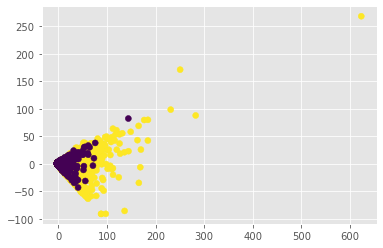

In [33]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)

In [34]:
# # clf = SVC()
# from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = RandomForestClassifier(n_jobs=-1, verbose=True)

In [36]:
clf.fit(x_scaled, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


RandomForestClassifier(n_jobs=-1, verbose=True)

In [37]:
def plot_roc_auc_f1(true_labels, probability, title=None):
    # This is a convenience function that takes care of boring stuff
    f1 = f1_score(true_labels, probability[:, 1]>.5)
    fpr, tpr, _ = roc_curve(true_labels, probability[:, 1])
    auc_score = auc(fpr, tpr)
    fig, ax = plt.subplots(figsize=(6,6))
    if title is not None:
        ax.set_title(title)
    ax.plot([0, 1], [0, 1], '--', label="Random")
    ax.plot(fpr, tpr, label="Your model")
    ax.set_xlabel("False positive rate")
    ax.set_ylabel("True positive rate")
    ax.annotate(f"AUC: {auc_score:.4}", (.8, 0.15))
    ax.annotate(f"F1: {f1:.4}", (.8, 0.1))
    ax.legend()
    return f1, auc_score

In [38]:
x_test = test.drop(columns=['is_returning_customer'])
y_test = test['is_returning_customer'].to_numpy()

In [39]:
y_proba = clf.predict_proba(scaler.transform(x_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


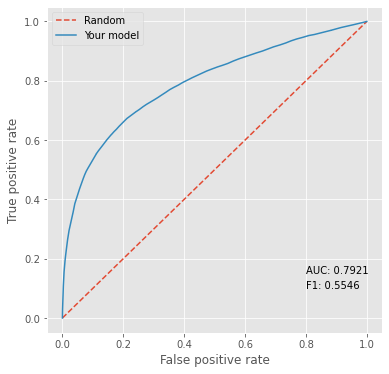

In [40]:
f1, auc_score = plot_roc_auc_f1(y_test, y_proba);

In [41]:
print(classification_report(y_proba[:, 1]>=.5, y_test))

              precision    recall  f1-score   support

       False       0.76      0.90      0.82     32168
        True       0.70      0.46      0.55     16923

    accuracy                           0.74     49091
   macro avg       0.73      0.68      0.69     49091
weighted avg       0.74      0.74      0.73     49091



In [42]:
test.groupby('is_returning_customer')['n_orders'].count()

is_returning_customer
0    37990
1    11101
Name: n_orders, dtype: int64

### Probability distribution

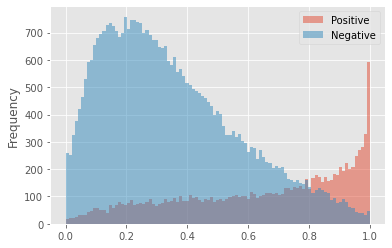

In [43]:
pd.Series(y_proba[:, 1]).loc[y_test>=.5].plot.hist(bins=99, alpha=.5, label='Positive')
pd.Series(y_proba[:, 1]).loc[y_test<.5].plot.hist(bins=99, alpha=.5, label='Negative')
plt.legend();

### Now done better, with pipelines

In [44]:
# scoring = {'AUC': 'roc_auc'}, 'Accuracy': make_scorer(accuracy_score)}

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
scaler = RobustScaler()

In [47]:
rf = RandomForestClassifier(n_jobs=-1, verbose=3)

In [48]:
svm = SVC(verbose=3)

In [49]:
logreg = LogisticRegression(verbose=3, n_jobs=-1)

In [50]:
pipe = Pipeline(
    steps=[('scaler', scaler), ('classifier', rf)]
)

In [54]:
np.logspace(-3, 0, 5)

array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ])

In [55]:
param_grid = [
    {'classifier': [rf], 'classifier__n_estimators': [1000]},
    {'classifier': [logreg], 'classifier__C': np.logspace(-3, 0, 5)},
]

In [56]:
search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)

In [57]:
search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               verbose=3))]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(n_jobs=-1,
                                                                verbose=3)],
                          'classifier__n_estimators': [1000]},
                         {'classifier': [LogisticRegression(C=0.03162277660168379,
                                                            n_jobs=-1,
                                                            verbose=3)],
                          'classifier__C': array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ])}],
             scoring='roc_auc', verbose=3)

In [58]:
print(f"Best parameter (CV score={search.best_score_:3f}):")

Best parameter (CV score=0.803686):


In [59]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.804):
{'classifier': LogisticRegression(C=0.03162277660168379, n_jobs=-1, verbose=3), 'classifier__C': 0.03162277660168379}


In [60]:
search.cv_results_

{'mean_fit_time': array([121.37189121,   0.60695772,   0.98306813,   1.03745613,
          1.22720304,   1.11842575]),
 'std_fit_time': array([40.76996911,  0.04694136,  0.0762985 ,  0.12574458,  0.3126483 ,
         0.17275622]),
 'mean_score_time': array([4.57893476, 0.00844393, 0.00769138, 0.00720067, 0.00782619,
        0.00758109]),
 'std_score_time': array([1.55704875e+00, 2.19946445e-03, 5.00778756e-04, 5.12326487e-04,
        1.07325719e-03, 5.93992367e-04]),
 'param_classifier': masked_array(data=[RandomForestClassifier(n_jobs=-1, verbose=3),
                    LogisticRegression(C=0.03162277660168379, n_jobs=-1, verbose=3),
                    LogisticRegression(C=0.03162277660168379, n_jobs=-1, verbose=3),
                    LogisticRegression(C=0.03162277660168379, n_jobs=-1, verbose=3),
                    LogisticRegression(C=0.03162277660168379, n_jobs=-1, verbose=3),
                    LogisticRegression(C=0.03162277660168379, n_jobs=-1, verbose=3)],
              ma

In [61]:
search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier',
                 LogisticRegression(C=0.03162277660168379, n_jobs=-1,
                                    verbose=3))])

In [62]:
y_proba = search.predict_proba(x_test)

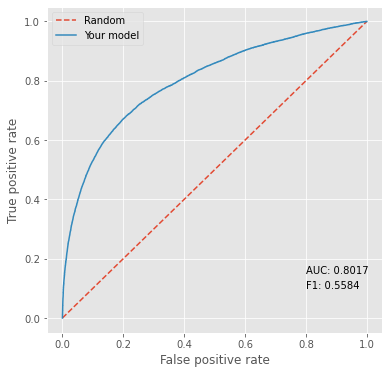

In [63]:
f1, auc_score = plot_roc_auc_f1(y_test, y_proba);

In [64]:
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

#### Balance test set

In [66]:
test.shape, test['is_returning_customer'].sum()

((49091, 23), 11101)

In [67]:
test_balanced = pd.concat((test[y_test==1], test[y_test!=1].sample(n=11101, random_state=42)))

In [68]:
y_test_bal = test_balanced['is_returning_customer'].to_numpy()

In [69]:
x_test_bal = test_balanced.drop(columns=['is_returning_customer']).to_numpy()

In [70]:
print(classification_report(y_test_bal, search.predict(x_test_bal)))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74     11101
           1       0.74      0.72      0.73     11101

    accuracy                           0.73     22202
   macro avg       0.73      0.73      0.73     22202
weighted avg       0.73      0.73      0.73     22202



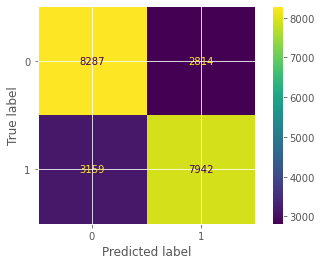

In [71]:
plot_confusion_matrix(search, x_test_bal, y_test_bal);

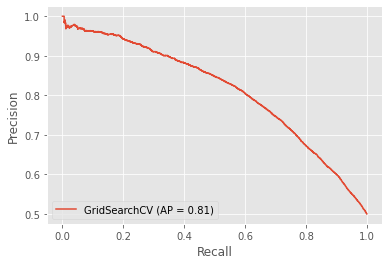

In [72]:
plot_precision_recall_curve(search, x_test_bal, y_test_bal)

(0.7267237040764972, 0.7985931209651933)

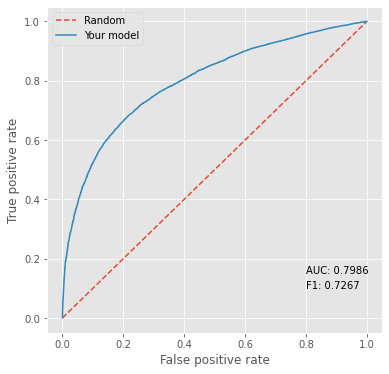

In [73]:
plot_roc_auc_f1(y_test_bal, search.predict_proba(x_test_bal))

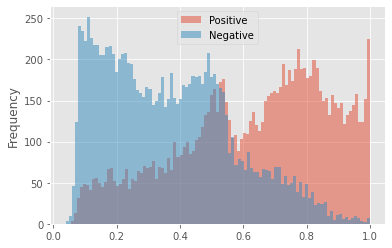

In [74]:
y_proba = search.predict_proba(x_test_bal)
pd.Series(y_proba[:, 1]).loc[y_test_bal>=.5].plot.hist(bins=99, alpha=.5, label='Positive')
pd.Series(y_proba[:, 1]).loc[y_test_bal<.5].plot.hist(bins=99, alpha=.5, label='Negative')
plt.legend();